## Question

Dataset Selection:
For this assignment, we'll utilize the widely recognized Mushroom Dataset

Task 1: Exploratory Data Analysis (EDA)
1.	Load the Mushroom dataset and perform fundamental data exploration.
2.	Utilize histograms, box plots, or density plots to understand feature distributions.
3.	Investigate feature correlations to discern relationships within the data.

Task 2: Data Preprocessing
1.	Encode categorical variables if necessary.
2.	Split the dataset into training and testing sets.

Task 3: Data Visualization
1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.
2.	Visualize class distributions to gauge dataset balance or imbalance.

Task 4: SVM Implementation
1.	Implement a basic SVM classifier using Python libraries like scikit-learn.
2.	Train the SVM model on the training data.
3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

Task 5: Visualization of SVM Results
1.	Visualize classification results on the testing data.

Task 6: Parameter Tuning and Optimization
1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

Task 7: Comparison and Analysis
1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).
2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.
3.	Discuss practical implications of SVM in real-world classification tasks.



## Answer

In [24]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder 
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report 

In [25]:
# Reading the mushroom file

mushroom_data = pd.read_csv('mushroom.csv')
mushroom_data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [26]:
mushroom_data['class'].value_counts()

poisonous    1400
edible        600
Name: class, dtype: int64

In [27]:
# Check for null values

mushroom_data.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [28]:
# Check for duplicates

mushroom_data.duplicated().any()

True

In [29]:
# Drop duplicates
mushroom_data.drop_duplicates(inplace=True)
mushroom_data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,877,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,...,universal,brown,none,large,brown,numerous,paths,edible,13.020616,9.993008
1988,926,bell,grooves,pink,yes,anise,descending,distant,broad,brown,...,partial,brown,two,pendant,yellow,numerous,grasses,poisonous,3.751597,18.868135
1989,289,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,...,universal,orange,two,none,orange,abundant,grasses,edible,13.134058,15.740028
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957


In [30]:
# Drop the unnamed column
mushroom_data.drop('Unnamed: 0', axis=1, inplace=True)
mushroom_data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,conical,grooves,brown,no,foul,notched,crowded,broad,chocolate,tapering,...,universal,brown,none,large,brown,numerous,paths,edible,13.020616,9.993008
1988,bell,grooves,pink,yes,anise,descending,distant,broad,brown,enlarging,...,partial,brown,two,pendant,yellow,numerous,grasses,poisonous,3.751597,18.868135
1989,sunken,smooth,purple,yes,anise,descending,crowded,narrow,buff,tapering,...,universal,orange,two,none,orange,abundant,grasses,edible,13.134058,15.740028
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957


In [62]:
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 976 non-null    object 
 1   cap_surface               976 non-null    object 
 2   cap_color                 976 non-null    object 
 3   bruises                   976 non-null    object 
 4   odor                      976 non-null    object 
 5   gill_attachment           976 non-null    object 
 6   gill_spacing              976 non-null    object 
 7   gill_size                 976 non-null    object 
 8   gill_color                976 non-null    object 
 9   stalk_shape               976 non-null    object 
 10  stalk_root                976 non-null    object 
 11  stalk_surface_above_ring  976 non-null    object 
 12  stalk_surface_below_ring  976 non-null    object 
 13  stalk_color_above_ring    976 non-null    object 
 14  stalk_col

In [31]:
# Set features and targets

y = mushroom_data['class']                   # target
x = mushroom_data.drop('class', axis=1)      # features

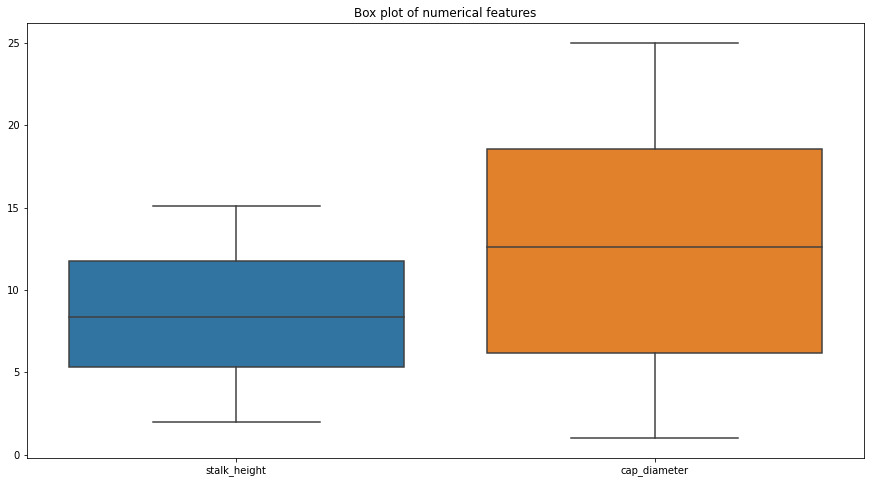

In [32]:
# Understanding feature distribution through various plots

# Box plot of numerical features
plt.figure(figsize=(15,8))
sns.boxplot(data=x, orient='v')
plt.title('Box plot of numerical features')
plt.show()

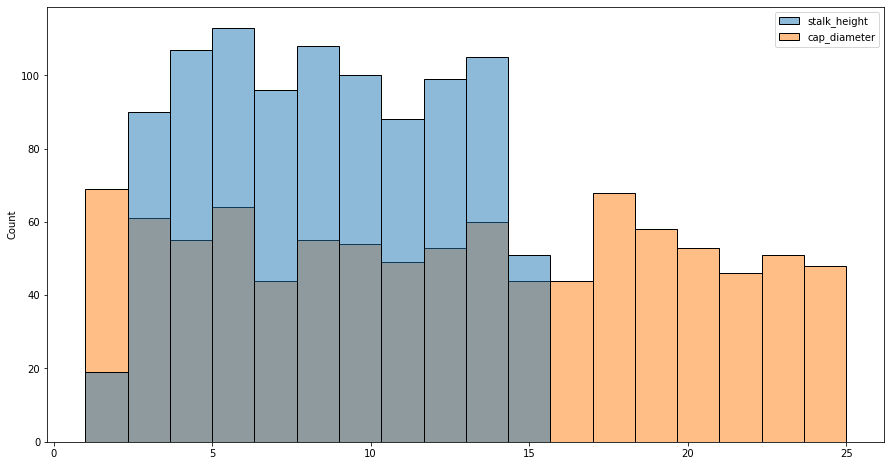

In [33]:
# Histogram plot
plt.figure(figsize=(15,8))
sns.histplot(x, kde=False)
plt.show()

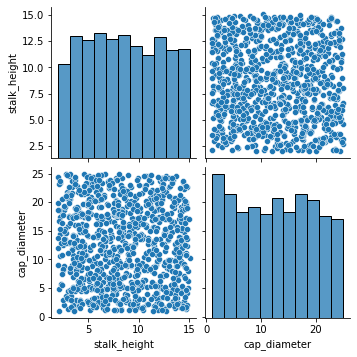

In [34]:
sns.pairplot(mushroom_data)
plt.show()

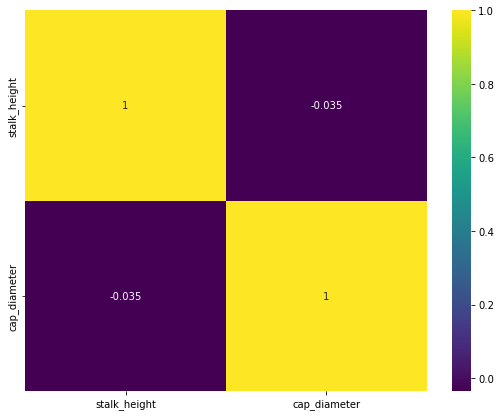

In [35]:
# Correlation matrix
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(mushroom_data.corr(), annot=True, fmt='.2g', cmap="viridis")
plt.show()

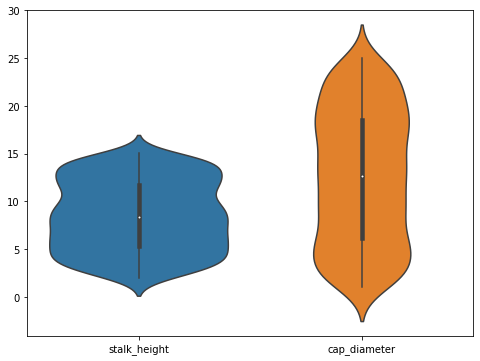

In [61]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=x)
plt.show()

In [36]:
# Split into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=365, stratify=y)

In [37]:
# Check results from stratification

y_train.value_counts(normalize=True)

poisonous    0.633333
edible       0.366667
Name: class, dtype: float64

In [38]:
pd.Series(y_test).value_counts(normalize=True)

poisonous    0.632653
edible       0.367347
Name: class, dtype: float64

In [39]:
# define a separate encoder for target inputs

enc_x = OrdinalEncoder()
enc_y = LabelEncoder()

In [45]:
# Apply the fit_transform() method on the training data and the transform() method on the test data

x_train_transf = enc_x.fit_transform(x_train)
#x_test_transf = enc_x.transform(x_test)

y_train_transf = enc_y.fit_transform(y_train)
y_test_transf = enc_y.transform(y_test)

In [46]:
# Combine the training and test data
x_combined = pd.concat([x_train, x_test])

# Fit the encoder on the combined data
enc_x.fit(x_combined)

# Transform both the training and test data
x_train_transf = enc_x.transform(x_train)
x_test_transf = enc_x.transform(x_test)

In [47]:
# In order for the SVC to work correctly the inputs need to be rescaled to the range (-1, 1)

scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train_transf)
x_train_rescaled = scaling.transform(x_train_transf)

In [48]:
# Initiating classification

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(x_train_rescaled, y_train_transf)

In [49]:
enc_y.classes_

array(['edible', 'poisonous'], dtype=object)

In [50]:
# Evaluate model on test data

y_pred_test = svc.predict(scaling.transform(x_test_transf))

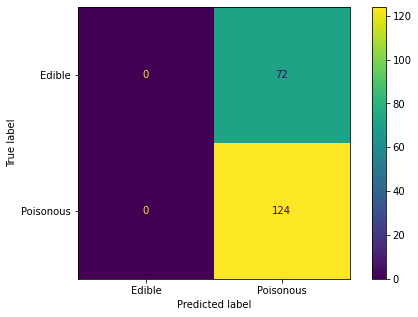

In [51]:
fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_transf, y_pred_test),
    display_labels=["Edible", "Poisonous"],
)

cmp.plot(ax=ax);

In [56]:
print(classification_report(y_test_transf, y_pred_test, target_names = ["Edible", "Poisonous"]))

              precision    recall  f1-score   support

      Edible       0.00      0.00      0.00        72
   Poisonous       0.63      1.00      0.78       124

    accuracy                           0.63       196
   macro avg       0.32      0.50      0.39       196
weighted avg       0.40      0.63      0.49       196



In [68]:
accuracy_score(y_test_transf, y_pred_test)

0.6326530612244898

In [53]:
# Hyperparameter tuning using GridSearchCV

tuned_parameters = [
    {"kernel": ["linear"], "C": [1, 10]},
    {"kernel": ["poly"], "C": [1, 10]},
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10]}
]

In [55]:
import warnings
warnings.filterwarnings("ignore")

scores = ["precision", "recall"]

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(x_train_rescaled, y_train_transf)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test_transf, clf.predict(scaling.transform(x_test_transf))
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'kernel': 'poly'}

Grid scores on development set:

0.317 (+/-0.003) for {'C': 1, 'kernel': 'linear'}
0.317 (+/-0.003) for {'C': 10, 'kernel': 'linear'}
0.430 (+/-0.074) for {'C': 1, 'kernel': 'poly'}
0.476 (+/-0.119) for {'C': 10, 'kernel': 'poly'}
0.317 (+/-0.003) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.317 (+/-0.003) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.317 (+/-0.003) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.317 (+/-0.003) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.39      0.39      0.39        72
           1       0.65      0.65      0.65       124

    accuracy                           0.56       196
   macro avg       0.52      0.52      0.

Support Vector Machines (SVMs) are powerful tools for classification tasks with various practical implications in real-world scenarios. Here are some key practical implications of SVMs in real-world classification tasks:

High-Dimensional Data: SVMs perform well in high-dimensional spaces, making them suitable for tasks with a large number of features, such as text classification, image recognition, and bioinformatics.

Non-Linear Decision Boundaries: SVMs can model complex, non-linear decision boundaries through the use of different kernel functions (e.g., polynomial, radial basis function), allowing them to handle non-linearly separable data.

Robustness to Overfitting: SVMs are less prone to overfitting compared to other models like decision trees, especially in high-dimensional spaces. They achieve this by maximizing the margin between classes.

Efficient Memory Usage: SVMs use a subset of training points (support vectors) to define the decision boundary, which reduces the memory requirements and makes them efficient for large datasets.

Balance between Bias and Variance: SVMs offer a good balance between bias and variance, making them suitable for tasks where finding the right balance is crucial, such as in medical diagnostics or financial forecasting.

Handling Imbalanced Datasets: SVMs can handle imbalanced datasets by adjusting class weights or using techniques like one-class SVMs for anomaly detection.

Interpretability: SVMs provide good interpretability, as the decision boundary is defined by a subset of the training data points (support vectors), making it easier to understand the model's decision-making process.

Versatility: SVMs can be applied to a wide range of classification tasks, including binary and multiclass classification, making them versatile for various real-world applications.

Scalability: SVMs can be scaled to large datasets using optimization techniques and parallel computing, making them suitable for real-time or big data applications.

Overall, SVMs are valuable tools in real-world classification tasks due to their ability to handle high-dimensional data, model non-linear decision boundaries, and provide a good balance between bias and variance. However, they may require careful selection of hyperparameters and kernel functions to achieve optimal performance.





